In [18]:
#Dependencies
import pandas as pd
import matplotlib.pyplot as plt
#import seaborn as sns

In [19]:
#Save path to data set in a variable
data_file = "city_data.csv"
data_file2 = "ride_data.csv"

In [21]:
#Use pandas to read the data
#print(data_file)
#data_file_pd = pd.read_json(data_file)
# pd_file = pd.read_csv(data_file)
# pd_file.head()

pd_file = pd.read_csv(data_file)
pd_file.head()

,city,driver_count,type
0,Kelseyland,63,Urban
1,Nguyenbury,8,Urban
2,East Douglas,12,Urban
3,West Dawnfurt,34,Urban
4,Rodriguezburgh,52,Urban


In [22]:
pd_file2 = pd.read_csv(data_file2)
pd_file2.head()

,city,date,fare,ride_id
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673


In [146]:
#Merge the files together on city, which is the common field between the two.
# Merge our two data frames together
combined_pyber_data = pd.merge(pd_file, pd_file2 , on="city")
combined_pyber_data.head()

,city,driver_count,type,date,fare,ride_id
0,Kelseyland,63,Urban,2016-08-19 04:27:52,5.51,6246006544795
1,Kelseyland,63,Urban,2016-04-17 06:59:50,5.54,7466473222333
2,Kelseyland,63,Urban,2016-05-04 15:06:07,30.54,2140501382736
3,Kelseyland,63,Urban,2016-01-25 20:44:56,12.08,1896987891309
4,Kelseyland,63,Urban,2016-08-09 18:19:47,17.91,8784212854829


In [62]:
pwd

'C:\\Users\\mukag\\Desktop\\rcb\\MatplotlibHW'

In [138]:
#Create a dataframe that groups by city.
citygroup = pd.DataFrame(combined_pyber_data.groupby(["city"]).count())
citygroup.head()


,driver_count,type,date,fare,ride_id
city,,,,,
Alvarezhaven,31,31,31,31,31
Alyssaberg,26,26,26,26,26
Anitamouth,9,9,9,9,9
Antoniomouth,22,22,22,22,22
Aprilchester,19,19,19,19,19


In [144]:
avgfare = round(combined_pyber_data.groupby(["city"]).mean()["fare"],2)
avgfare.head()

city
Alvarezhaven    23.93
Alyssaberg      20.61
Anitamouth      37.32
Antoniomouth    23.62
Aprilchester    21.98
Name: fare, dtype: float64

In [142]:
totalrides = combined_pyber_data.groupby(["city"]).count()["ride_id"]
totalrides.head()

city
Alvarezhaven    31
Alyssaberg      26
Anitamouth       9
Antoniomouth    22
Aprilchester    19
Name: ride_id, dtype: int64

In [152]:
# totaldrivers = combined_pyber_data.groupby("city").mean()["driver_count"]
# totalrides.head()

bycity = combined_pyber_data.groupby('city')
driver_count = bycity.mean()['driver_count']
driver_count.head()

city
Alvarezhaven    21.0
Alyssaberg      67.0
Anitamouth      16.0
Antoniomouth    21.0
Aprilchester    49.0
Name: driver_count, dtype: float64

In [155]:
cityanalysis = pd.DataFrame({"Average Fare":avgfare,
                        "Rides Per City":totalrides,
                         "Drivers per City":driver_count})
#"City Type": "type"} )
cityanalysis.head()

,Average Fare,Drivers per City,Rides Per City
city,,,
Alvarezhaven,23.93,21.0,31
Alyssaberg,20.61,67.0,26
Anitamouth,37.32,16.0,9
Antoniomouth,23.62,21.0,22
Aprilchester,21.98,49.0,19


In [173]:
#Create a new dataframe as a copy of pd_file (citydata csv) and set the index to city for merging purposes.
pd_file.reset_index()
pd_file.head()
citycsv = pd.DataFrame(pd_file)
citycsv = citycsv.reset_index()
citycsv = citycsv.set_index('city')
citycsv.head()

,index,driver_count,type
city,,,
Kelseyland,0,63,Urban
Nguyenbury,1,8,Urban
East Douglas,2,12,Urban
West Dawnfurt,3,34,Urban
Rodriguezburgh,4,52,Urban


In [181]:
cityanalysis2 = pd.DataFrame(cityanalysis)
cityanalysis2 = cityanalysis2.reset_index()
cityanalysis2 = cityanalysis2.set_index('city')
cityanalysis2.head()

,Average Fare,Drivers per City,Rides Per City
city,,,
Alvarezhaven,23.93,21.0,31
Alyssaberg,20.61,67.0,26
Anitamouth,37.32,16.0,9
Antoniomouth,23.62,21.0,22
Aprilchester,21.98,49.0,19


In [187]:
#Merge the dataframe above with the citydata csv to get the type.
getcity = pd.merge(citycsv, cityanalysis2, left_index=True,right_index=True) 
#on="city",left_index=True,right_index=True)
#drop driver count and index as they are irrelvant.
del getcity["index"]
del getcity["driver_count"]
getcity.head()

,type,Average Fare,Drivers per City,Rides Per City
city,,,,
Alvarezhaven,Urban,23.93,21.0,31
Alyssaberg,Urban,20.61,67.0,26
Anitamouth,Suburban,37.32,16.0,9
Antoniomouth,Urban,23.62,21.0,22
Aprilchester,Urban,21.98,49.0,19


Text(0.5,0,'Average Fares ($)')

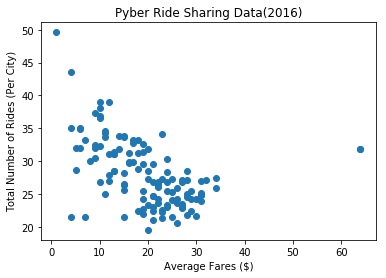

In [197]:

#ridelist = cityanalysis['Rides Per City'].tolist()
#avgfairlist = cityanalysis['Average Fare'].tolist()

ridelist = getcity['Rides Per City'].tolist()
avgfairlist = getcity['Average Fare'].tolist()
typelist = getcity['type'].tolist()
#s = getcity["type"]
plt.scatter(x=ridelist, y=avgfairlist)
#plt.scatter(x=ridelist, y=avgfairlist, s=typelist, c="red", alpha=0.4)
plt.title('Pyber Ride Sharing Data(2016)')
plt.ylabel('Total Number of Rides (Per City)')
plt.xlabel('Average Fares ($)')

# Total Fares by City Type

In [200]:
#% of Total Fares 
# demogroup = combined_pyber_data.groupby(["city","type"])
# demogroup.size()
typegroup = combined_pyber_data.groupby(["type","city"])
#typegroup.head()


In [87]:
ridespertype = combined_pyber_data.groupby(["city","type"]).size()
ridespertype
#create into a dataframe
farespertype = pd.DataFrame(ridespertype)
farespertype
typefares = pd.DataFrame(farespertype.groupby(["type"]).count())
typefares.columns = ["NumberFares"]
typefares


,NumberFares
type,
Rural,18
Suburban,41
Urban,66


In [92]:
#Total Number of Fares
fares_count = typefares["NumberFares"].sum()
fares_count

125

In [89]:
ruralrides = typefares["NumberFares"].loc["Rural"]
print(ruralrides)

18


In [96]:
subrides = typefares["NumberFares"].loc["Suburban"]
print(subrides)

41


In [97]:
urbanrides = typefares["NumberFares"].loc["Urban"]
print(urbanrides)

66


In [95]:
ruralpercent = round(ruralrides / fares_count, 2) * 100
ruralpercent

14.000000000000002

In [98]:
# Labels for the sections of our pie chart
labels = ["Rural", "Suburban", "Urban"]

# The values of each section of the pie chart
sizes = [ruralrides, subrides, urbanrides]

# The colors of each section of the pie chart
colors = ["yellowgreen", "red", "lightcoral"]
#, "lightskyblue"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0.1, 0, 0)

([<matplotlib.patches.Wedge at 0x1871d9d6390>,
 [Text(-1.16395,0.291932,'Rural'),
  Text(-0.360303,-1.03932,'Suburban'),
  Text(0.77836,0.777274,'Urban')],
 [Text(-0.67897,0.170294,'14.4%'),
  Text(-0.196529,-0.566901,'32.8%'),
  Text(0.42456,0.423968,'52.8%')])

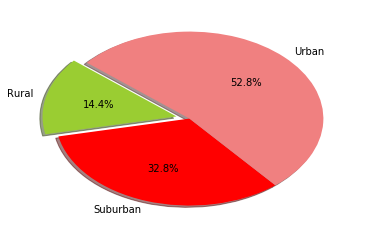

In [99]:
# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

In [199]:
# Tells matplotlib that we want a pie chart with equal axes
#plt.axis("equal")

In [104]:
# Prints our pie chart to the screen
plt.show()

# Total Rides by City Type

In [205]:
#Total Rides by City Type
ridestype = pd.DataFrame(combined_pyber_data.groupby(["city","type"]).sum())

ridestype = pd.DataFrame(combined_pyber_data.groupby(["type"]).count()["ride_id"])
ridestype.columns = ["NumberRides"]
ridestype

,NumberRides
type,
Rural,125
Suburban,657
Urban,1625


In [206]:
riders_count = ridestype["NumberRides"].sum()
riders_count

2407

In [211]:
ruralrides = ridestype["NumberRides"].loc["Rural"]
print(ruralrides)
subrides = ridestype["NumberRides"].loc["Suburban"]
print(subrides)
urbanrides = ridestype["NumberRides"].loc["Urban"]
print(urbanrides)

125
657
1625


In [212]:
# Labels for the sections of our pie chart
labels = ["Rural", "Suburban", "Urban"]

# The values of each section of the pie chart
sizes = [ruralrides, subrides, urbanrides]

# The colors of each section of the pie chart
colors = ["yellowgreen", "red", "lightcoral"]
#, "lightskyblue"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0.1, 0, 0)

([<matplotlib.patches.Wedge at 0x1871f1e75f8>,
 [Text(-1.03233,0.611792,'Rural'),
  Text(-0.972796,-0.513487,'Suburban'),
  Text(1.04328,0.348661,'Urban')],
 [Text(-0.602194,0.356878,'5.2%'),
  Text(-0.530616,-0.280084,'27.3%'),
  Text(0.569062,0.190179,'67.5%')])

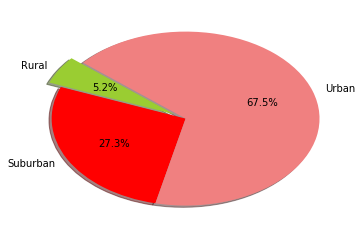

In [213]:
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

# Total Drivers by City Type

In [237]:
#Total Rides by City Type
# driverstype = pd.DataFrame(combined_pyber_data.groupby(["city","type"]).count())
# driverstype
bytype = combined_pyber_data.groupby("type")
drivers = pd.DataFrame(bytype.sum()['driver_count'])
#drivers.columns = "Total Drivers"
drivers

,driver_count
type,
Rural,727
Suburban,9730
Urban,64501


In [244]:
ruraldrivers = drivers.loc['Rural']
ruraldrivers

driver_count    727
Name: Rural, dtype: int64

In [243]:
subdrivers = drivers.loc['Suburban']
subdrivers

driver_count    9730
Name: Suburban, dtype: int64

In [245]:
urbandrivers = drivers.loc['Urban']
urbandrivers 

driver_count    64501
Name: Urban, dtype: int64

In [246]:
# Labels for the sections of our pie chart
labels = ["Rural", "Suburban", "Urban"]

# The values of each section of the pie chart
sizes = [ruraldrivers, subdrivers, urbandrivers]

# The colors of each section of the pie chart
colors = ["yellowgreen", "red", "lightcoral"]
#, "lightskyblue"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0.1, 0, 0)
# group = ridestype["ride_id"].count()
# group

([<matplotlib.patches.Wedge at 0x1871e099da0>,
 [Text(-0.942326,0.742982,'Rural'),
  Text(-1.07118,0.250127,'Suburban'),
  Text(1.06307,-0.282644,'Urban')],
 [Text(-0.54969,0.433406,'1.0%'),
  Text(-0.584283,0.136433,'13.0%'),
  Text(0.579855,-0.15417,'86.0%')])

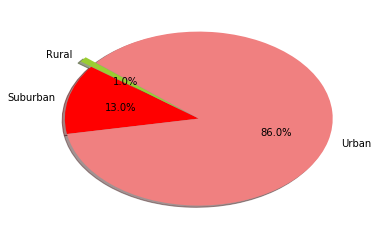

In [247]:
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

In [215]:
# countfare = demogroup.count()["fare"]
# countfare

In [55]:
#type(pd_file.groupby(["city","type"]))

In [49]:
#list(pd_file.groupby(["type"]))

In [50]:
# for group_key, group_value in pd_file.groupby('type'):
#     print(group_key)
#     print(group_value)

In [214]:
# for group_key, group_value in typegroup:
#     print(group_key)
#     print(group_value)